### Logistic Regression(모델의 성능개선 시도 : 표준화/GridSearch)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [3]:
# 데이터를 로드하고 전처리(학습데이터의 표준화)
X_train, y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [4]:
# 모델과 파라미터 그리드를 정의
model = LogisticRegression()
param_grid = {'C' : [0.1, 1, 10], 'penalty' : ['l1', 'l2']}

In [6]:
# 그리드 서치를 수행
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 최적 파라미터와 최고 정화도를 출력
print("Best Hyperparameters :", grid_search.best_params_)
print("Best Accuracy :", grid_search.best_score_)

# 테스트 데이터에 대해 모델을 평가
X_test, y_test = load_breast_cancer(return_X_y=True)
X_test_scaled = scaler.transform(X_test) # 테스트 입력 데이터 표준화
test_accuracy = grid_search.score(X_test_scaled, y_test)

print("Test Accuracy :", test_accuracy)

Best Hyperparameters : {'C': 1, 'penalty': 'l2'}
Best Accuracy : 0.9806862288464524
Test Accuracy : 0.9876977152899824


c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py", 

In [26]:
model = LogisticRegression(C=1, penalty='l2')
model.fit(X_train_scaled, y_train)


LogisticRegression(C=1)

In [29]:
# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9876977152899824


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 출력
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[207   5]
 [  2 355]]


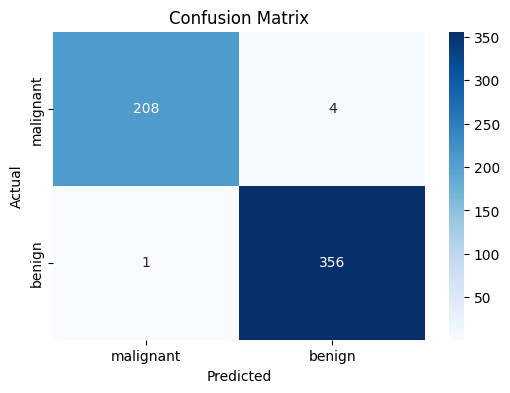

In [27]:
data = load_breast_cancer()

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [31]:
# 분류 리포트 출력
print("\nClassification Report")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report
              precision    recall  f1-score   support

   malignant       0.99      0.98      0.98       212
      benign       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

